# Chapter 11 of Wes McKinney's Python for Data Analysis 3rd ed.

In [181]:
import numpy as np
import pandas as pd

# 11.1 Data and Time Data Types and Tools

In [182]:
from datetime import datetime

In [183]:
now = datetime.now()

In [184]:
now

datetime.datetime(2023, 11, 8, 20, 50, 31, 304421)

In [185]:
now.year, now.month, now.day

(2023, 11, 8)

In [186]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [187]:
delta

datetime.timedelta(days=926, seconds=56700)

In [188]:
delta.days

926

In [189]:
delta.seconds

56700

In [190]:
from datetime import timedelta

In [191]:
start = datetime(2011, 1, 7)

In [192]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [193]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [194]:
stamp = datetime(2011, 1, 3)

In [195]:
str(stamp)

'2011-01-03 00:00:00'

In [196]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [197]:
stamp.strftime("%m-%d-%Y")

'01-03-2011'

In [198]:
stamp.strftime("%D")

'01/03/11'

In [199]:
value = "2011-01-03"

In [200]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [201]:
datestrs = ["7/6/2011", "8/6/2011"]

In [202]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [203]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [204]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [205]:
idx = pd.to_datetime(datestrs + [None])

In [206]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [207]:
idx[2]

NaT

In [208]:
pd.isna(idx)

array([False, False,  True])

# 11.2 Time Series Basics

In [209]:
dates = [
    datetime(2011, 1, 2), datetime(2011, 1, 5),
    datetime(2011, 1, 7), datetime(2011, 1, 8),
    datetime(2011, 1, 10), datetime(2011, 1, 12)
]

In [210]:
ts = pd.Series(np.random.standard_normal(6), index=dates)

In [211]:
ts

2011-01-02   -1.019071
2011-01-05   -2.218347
2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
2011-01-12   -0.460300
dtype: float64

In [212]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [213]:
ts + ts[::2]

2011-01-02   -2.038143
2011-01-05         NaN
2011-01-07   -0.916089
2011-01-08         NaN
2011-01-10   -1.756432
2011-01-12         NaN
dtype: float64

In [214]:
ts.index.dtype

dtype('<M8[ns]')

In [215]:
stamp =ts.index[0]

In [216]:
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting

In [217]:
stamp = ts.index[2]

In [218]:
ts[stamp]

-0.45804458673075427

In [219]:
ts["2011-01-10"]

-0.8782159782445411

In [220]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range("2000-01-01", periods=1000))

In [221]:
longer_ts

2000-01-01    0.031922
2000-01-02   -1.274626
2000-01-03   -0.895102
2000-01-04    0.135114
2000-01-05    1.299093
                ...   
2002-09-22   -2.068158
2002-09-23   -0.504356
2002-09-24    0.897658
2002-09-25   -0.543120
2002-09-26    1.371709
Freq: D, Length: 1000, dtype: float64

In [222]:
longer_ts["2001"]

2001-01-01   -0.999117
2001-01-02   -0.524786
2001-01-03   -0.203692
2001-01-04   -0.262781
2001-01-05   -0.156814
                ...   
2001-12-27    0.495598
2001-12-28   -0.981715
2001-12-29    1.081125
2001-12-30   -0.395631
2001-12-31   -1.227761
Freq: D, Length: 365, dtype: float64

In [223]:
longer_ts["2001-05"]

2001-05-01    0.494724
2001-05-02   -0.227726
2001-05-03    0.484149
2001-05-04   -0.165169
2001-05-05    0.459942
2001-05-06    0.197126
2001-05-07   -0.341704
2001-05-08   -0.824757
2001-05-09    0.288527
2001-05-10   -1.619270
2001-05-11    1.082327
2001-05-12    0.906515
2001-05-13   -0.113808
2001-05-14    1.751388
2001-05-15   -0.564063
2001-05-16    0.364076
2001-05-17   -0.960194
2001-05-18   -0.415863
2001-05-19    0.761679
2001-05-20    1.177120
2001-05-21    1.624399
2001-05-22    1.209435
2001-05-23   -2.104071
2001-05-24    1.260407
2001-05-25   -1.972131
2001-05-26    0.127698
2001-05-27    0.057950
2001-05-28    0.781498
2001-05-29    0.534437
2001-05-30    0.900249
2001-05-31   -0.573397
Freq: D, dtype: float64

In [224]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
2011-01-12   -0.460300
dtype: float64

In [225]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
dtype: float64

In [226]:
ts

2011-01-02   -1.019071
2011-01-05   -2.218347
2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
2011-01-12   -0.460300
dtype: float64

In [227]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
dtype: float64

In [228]:
ts.truncate(after="2011-01-09")

2011-01-02   -1.019071
2011-01-05   -2.218347
2011-01-07   -0.458045
2011-01-08   -1.875536
dtype: float64

In [229]:
dates = pd.date_range("2001-01-01", periods=100, freq="W-WED")

In [230]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                      index=dates,
                      columns=["Colorado", "Texas",
                              "New York", "Ohio"])

In [231]:
long_df.head()

,Colorado,Texas,New York,Ohio
2001-01-03,1.781433,0.855583,1.095258,-0.645940
2001-01-10,-1.481722,0.070058,-0.150881,-0.013010
2001-01-17,-1.097792,0.831068,0.558483,1.013453
2001-01-24,-0.411250,1.121296,0.025568,-2.284348
2001-01-31,-0.334194,-0.259713,0.652694,1.064353


In [232]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.110453,2.439007,-0.811621,-1.510561
2001-05-09,-0.190594,-0.317205,0.924526,-0.777614
2001-05-16,0.558699,0.269017,0.598303,-0.931721
2001-05-23,0.773763,0.647130,2.576936,-0.939506
2001-05-30,-0.422695,0.408552,0.993091,-0.133493


## Time Series with Duplicate Indices

In [233]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                         "2000-01-02", "2000-01-03"])

In [234]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [235]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [236]:
dup_ts.index.is_unique

False

In [237]:
dup_ts["2000-01-03"] # not duplicated

4

In [238]:
dup_ts["2000-01-02"] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [239]:
grouped = dup_ts.groupby(level=0)

In [240]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [241]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

In [242]:
ts

2011-01-02   -1.019071
2011-01-05   -2.218347
2011-01-07   -0.458045
2011-01-08   -1.875536
2011-01-10   -0.878216
2011-01-12   -0.460300
dtype: float64

In [243]:
resampler = ts.resample("D")

In [244]:
resampler

## Generating Date Ranges

In [245]:
index = pd.date_range("2012-04-01", "2012-06-01")

In [246]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [247]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [248]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [249]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [250]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [251]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [252]:
from pandas.tseries.offsets import Hour, Minute

In [253]:
hour = Hour()

In [254]:
hour

<Hour>

In [255]:
four_hours = Hour(4)

In [256]:
four_hours

<4 * Hours>

In [257]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [258]:
Hour(2) + Minute(30)

<150 * Minutes>

In [259]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

In [260]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")

In [261]:
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

## Shifting (Leading and Lagging) Data

In [262]:
ts = pd.Series(np.random.standard_normal(4),
              index=pd.date_range("2000-01-01", periods=4, freq="M"))

In [263]:
ts

2000-01-31    0.103511
2000-02-29   -0.821912
2000-03-31   -2.070438
2000-04-30    0.628204
Freq: M, dtype: float64

In [264]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.103511
2000-04-30   -0.821912
Freq: M, dtype: float64

In [265]:
ts.shift(-2)

2000-01-31   -2.070438
2000-02-29    0.628204
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [266]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -8.940309
2000-03-31    1.519051
2000-04-30   -1.303416
Freq: M, dtype: float64

In [267]:
ts.shift(2, freq="M")

2000-03-31    0.103511
2000-04-30   -0.821912
2000-05-31   -2.070438
2000-06-30    0.628204
Freq: M, dtype: float64

In [268]:
ts.shift(3, freq="D")

2000-02-03    0.103511
2000-03-03   -0.821912
2000-04-03   -2.070438
2000-05-03    0.628204
dtype: float64

In [269]:
ts.shift(1, freq="90T")

2000-01-31 01:30:00    0.103511
2000-02-29 01:30:00   -0.821912
2000-03-31 01:30:00   -2.070438
2000-04-30 01:30:00    0.628204
dtype: float64

#### Shifting dates with offsets

In [270]:
from pandas.tseries.offsets import Day, MonthEnd

In [271]:
now = datetime(2011, 11, 17)

In [272]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [273]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [274]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [275]:
offset = MonthEnd()

In [276]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [277]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [278]:
ts = pd.Series(np.random.standard_normal(20),
              index=pd.date_range("2000-01-15", periods=20, freq="4D"))

In [279]:
ts

2000-01-15   -0.509329
2000-01-19    0.994611
2000-01-23    0.554193
2000-01-27    0.595926
2000-01-31   -0.123496
2000-02-04    0.418616
2000-02-08    0.031387
2000-02-12   -0.310481
2000-02-16    2.143420
2000-02-20   -1.696111
2000-02-24    1.417006
2000-02-28   -0.420395
2000-03-03   -0.418548
2000-03-07    0.493495
2000-03-11    0.192586
2000-03-15   -0.222224
2000-03-19    1.272239
2000-03-23    0.373383
2000-03-27    0.779397
2000-03-31   -0.294755
Freq: 4D, dtype: float64

In [280]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.302381
2000-02-29    0.226206
2000-03-31    0.271947
dtype: float64

In [281]:
ts.resample("M").mean()

2000-01-31    0.302381
2000-02-29    0.226206
2000-03-31    0.271947
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [282]:
import pytz

In [283]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [284]:
tz = pytz.timezone("America/New_York")

In [285]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Time Zone Localization and Conversion

In [286]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

In [287]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [288]:
ts

2012-03-09 09:30:00   -2.227758
2012-03-10 09:30:00   -1.371607
2012-03-11 09:30:00   -0.698281
2012-03-12 09:30:00   -0.220295
2012-03-13 09:30:00   -0.660048
2012-03-14 09:30:00    0.583681
Freq: D, dtype: float64

In [289]:
print(ts.index.tz)

None


In [290]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [291]:
ts

2012-03-09 09:30:00   -2.227758
2012-03-10 09:30:00   -1.371607
2012-03-11 09:30:00   -0.698281
2012-03-12 09:30:00   -0.220295
2012-03-13 09:30:00   -0.660048
2012-03-14 09:30:00    0.583681
Freq: D, dtype: float64

In [292]:
ts_utc = ts.tz_localize("UTC")

In [293]:
ts_utc

2012-03-09 09:30:00+00:00   -2.227758
2012-03-10 09:30:00+00:00   -1.371607
2012-03-11 09:30:00+00:00   -0.698281
2012-03-12 09:30:00+00:00   -0.220295
2012-03-13 09:30:00+00:00   -0.660048
2012-03-14 09:30:00+00:00    0.583681
Freq: D, dtype: float64

In [294]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [295]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -2.227758
2012-03-10 04:30:00-05:00   -1.371607
2012-03-11 05:30:00-04:00   -0.698281
2012-03-12 05:30:00-04:00   -0.220295
2012-03-13 05:30:00-04:00   -0.660048
2012-03-14 05:30:00-04:00    0.583681
Freq: D, dtype: float64

In [296]:
ts_eastern = ts.tz_localize("America/New_York")

In [297]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -2.227758
2012-03-10 14:30:00+00:00   -1.371607
2012-03-11 13:30:00+00:00   -0.698281
2012-03-12 13:30:00+00:00   -0.220295
2012-03-13 13:30:00+00:00   -0.660048
2012-03-14 13:30:00+00:00    0.583681
dtype: float64

In [298]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -2.227758
2012-03-10 15:30:00+01:00   -1.371607
2012-03-11 14:30:00+01:00   -0.698281
2012-03-12 14:30:00+01:00   -0.220295
2012-03-13 14:30:00+01:00   -0.660048
2012-03-14 14:30:00+01:00    0.583681
dtype: float64

In [299]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

## Operations with Time Zone-Aware Timestamp Objects

In [300]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [301]:
stamp_utc = stamp.tz_localize("utc")

In [302]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [303]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")

In [304]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [305]:
stamp_utc.value

1299902400000000000

In [306]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [307]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")

In [308]:
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [309]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [310]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")

In [311]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [312]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations Between Different Time Zones

In [313]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

In [314]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [315]:
ts

2012-03-07 09:30:00    0.035126
2012-03-08 09:30:00    1.035712
2012-03-09 09:30:00   -0.947531
2012-03-12 09:30:00   -0.956910
2012-03-13 09:30:00    1.111254
2012-03-14 09:30:00   -0.528540
2012-03-15 09:30:00   -0.399977
2012-03-16 09:30:00   -1.587852
2012-03-19 09:30:00   -1.007053
2012-03-20 09:30:00    0.764758
Freq: B, dtype: float64

In [316]:
ts1 = ts[:7].tz_localize("Europe/London")

In [317]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

In [318]:
result = ts1 + ts2

In [319]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 Periods and Period Arithmetic

In [320]:
p = pd.Period("2011", freq="A-DEC")

In [321]:
p

Period('2011', 'A-DEC')

In [322]:
p + 5

Period('2016', 'A-DEC')

In [323]:
p -2

Period('2009', 'A-DEC')

In [324]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

In [325]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")

In [326]:
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [327]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.327188
2000-02   -0.027251
2000-03   -0.860099
2000-04   -2.228220
2000-05   -0.386607
2000-06   -0.338201
Freq: M, dtype: float64

In [328]:
values = ["2001Q3", "2002Q2", "2003Q1"]

In [329]:
index = pd.PeriodIndex(values, freq="Q-DEC")

In [330]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

## Period Frequency Conversion

In [331]:
p = pd.Period("2011", freq="A-DEC")

In [332]:
p

Period('2011', 'A-DEC')

In [333]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [334]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [335]:
p.asfreq("M")

Period('2011-12', 'M')

In [336]:
p = pd.Period("2011", freq="A-JUN")

In [337]:
p

Period('2011', 'A-JUN')

In [338]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [339]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [340]:
p = pd.Period("Aug-2011", "M")

In [341]:
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [342]:
periods = pd.period_range("2006", "2009", freq="A-DEC")

In [343]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)

In [344]:
ts

2006   -0.913901
2007    0.189853
2008   -1.684814
2009   -0.713470
Freq: A-DEC, dtype: float64

In [345]:
ts.asfreq("M", how="start")

2006-01   -0.913901
2007-01    0.189853
2008-01   -1.684814
2009-01   -0.713470
Freq: M, dtype: float64

In [346]:
ts.asfreq("B", how="end")

2006-12-29   -0.913901
2007-12-31    0.189853
2008-12-31   -1.684814
2009-12-31   -0.713470
Freq: B, dtype: float64

## Quarterly Period Frequencies

In [347]:
p = pd.Period("2012Q4", freq="Q-JAN")

In [348]:
p

Period('2012Q4', 'Q-JAN')

In [349]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [350]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [351]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

In [352]:
p4pm

Period('2012-01-30 16:00', 'T')

In [353]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [354]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [355]:
ts = pd.Series(np.arange(len(periods)), index=periods)

In [356]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [357]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") +16

In [358]:
ts.index = new_periods.to_timestamp()

In [359]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

## Converting Timestamps to Periods (and Back)

In [361]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

In [362]:
ts = pd.Series(np.random.standard_normal(3), index=dates)

In [363]:
ts

2000-01-31   -0.711114
2000-02-29    1.193855
2000-03-31   -0.157043
Freq: M, dtype: float64

In [364]:
pts = ts.to_period()

In [365]:
pts

2000-01   -0.711114
2000-02    1.193855
2000-03   -0.157043
Freq: M, dtype: float64

In [366]:
dates = pd.date_range("2000-01-29", periods=6)

In [367]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)

In [368]:
ts2

2000-01-29   -2.053362
2000-01-30   -0.086830
2000-01-31    1.820065
2000-02-01   -0.799345
2000-02-02   -0.944937
2000-02-03    2.237056
Freq: D, dtype: float64

In [369]:
ts2.to_period("M")

2000-01   -2.053362
2000-01   -0.086830
2000-01    1.820065
2000-02   -0.799345
2000-02   -0.944937
2000-02    2.237056
Freq: M, dtype: float64

In [370]:
pts = ts2.to_period()

In [371]:
pts

2000-01-29   -2.053362
2000-01-30   -0.086830
2000-01-31    1.820065
2000-02-01   -0.799345
2000-02-02   -0.944937
2000-02-03    2.237056
Freq: D, dtype: float64

In [372]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -2.053362
2000-01-30 23:59:59.999999999   -0.086830
2000-01-31 23:59:59.999999999    1.820065
2000-02-01 23:59:59.999999999   -0.799345
2000-02-02 23:59:59.999999999   -0.944937
2000-02-03 23:59:59.999999999    2.237056
Freq: D, dtype: float64

## Creating a PeriodIndex from Arrays

In [373]:
data = pd.read_csv("/kaggle/input/macrodata/macrodata.csv")

In [374]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [375]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [376]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [377]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                      freq="Q-DEC")

In [378]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [379]:
data.index = index

In [380]:
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling and Frequency Conversion

In [381]:
dates = pd.date_range("2000-01-01", periods=100)

In [382]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [383]:
ts

2000-01-01   -1.607265
2000-01-02   -0.804951
2000-01-03   -1.492130
2000-01-04   -1.047561
2000-01-05    0.679527
                ...   
2000-04-05    0.436637
2000-04-06   -0.054842
2000-04-07    0.691662
2000-04-08    0.411122
2000-04-09    2.145532
Freq: D, Length: 100, dtype: float64

In [384]:
ts.resample("M").mean()

2000-01-31   -0.068272
2000-02-29   -0.340785
2000-03-31   -0.088234
2000-04-30    0.274799
Freq: M, dtype: float64

In [385]:
ts.resample("M", kind="period").mean()

2000-01   -0.068272
2000-02   -0.340785
2000-03   -0.088234
2000-04    0.274799
Freq: M, dtype: float64

## Downsampling

In [387]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")

In [388]:
ts = pd.Series(np.arange(len(dates)), index=dates)

In [389]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [390]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [391]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [392]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [393]:
from pandas.tseries.frequencies import to_offset

In [394]:
result = ts.resample("5min", closed="right", label="right").sum()

In [395]:
result.index = result.index + to_offset("-1s")

In [396]:
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Open-high_close (OHLC) resampling

In [397]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [398]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,7,10,2,2
2000-01-01 00:05:00,8,8,0,1
2000-01-01 00:10:00,5,11,5,11


## Upsampling and Interpolation

In [399]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                    index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
                    columns=["Colorado", "Texas", "New York", "Ohio"])

In [400]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.613742,1.733419,-0.293774,-0.072387
2000-01-12,0.036742,-1.749603,-0.428746,0.593246


In [401]:
df_daily = frame.resample("D").asfreq()

In [402]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.613742,1.733419,-0.293774,-0.072387
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.036742,-1.749603,-0.428746,0.593246


In [403]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.613742,1.733419,-0.293774,-0.072387
2000-01-06,0.613742,1.733419,-0.293774,-0.072387
2000-01-07,0.613742,1.733419,-0.293774,-0.072387
2000-01-08,0.613742,1.733419,-0.293774,-0.072387
2000-01-09,0.613742,1.733419,-0.293774,-0.072387
2000-01-10,0.613742,1.733419,-0.293774,-0.072387
2000-01-11,0.613742,1.733419,-0.293774,-0.072387
2000-01-12,0.036742,-1.749603,-0.428746,0.593246


In [404]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.613742,1.733419,-0.293774,-0.072387
2000-01-06,0.613742,1.733419,-0.293774,-0.072387
2000-01-07,0.613742,1.733419,-0.293774,-0.072387
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.036742,-1.749603,-0.428746,0.593246


In [405]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.613742,1.733419,-0.293774,-0.072387
2000-01-13,0.036742,-1.749603,-0.428746,0.593246


## Resampling with Periods

In [407]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                    index=pd.period_range("1-2000", "12-2001",
                                         freq="M"),
                    columns=["Colorado", "Texas", "New York", "Ohio"])

In [408]:
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,1.388389,0.755822,1.598851,0.340307
2000-02,-0.986354,-0.684880,0.763165,0.809847
2000-03,0.774404,-0.128883,-0.581708,-2.829232
2000-04,2.516855,0.073959,0.814693,-0.096544
2000-05,0.544324,-0.888811,1.409498,-0.764596


In [409]:
annual_frame = frame.resample("A-DEC").mean()

In [410]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.419316,-0.320702,0.509990,-0.131793
2001,0.035681,-0.210695,0.192179,0.089252


In [411]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.419316,-0.320702,0.509990,-0.131793
2000Q2,0.419316,-0.320702,0.509990,-0.131793
2000Q3,0.419316,-0.320702,0.509990,-0.131793
2000Q4,0.419316,-0.320702,0.509990,-0.131793
2001Q1,0.035681,-0.210695,0.192179,0.089252
2001Q2,0.035681,-0.210695,0.192179,0.089252
2001Q3,0.035681,-0.210695,0.192179,0.089252
2001Q4,0.035681,-0.210695,0.192179,0.089252


In [412]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.419316,-0.320702,0.509990,-0.131793
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.035681,-0.210695,0.192179,0.089252


In [413]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.419316,-0.320702,0.509990,-0.131793
2001Q1,0.419316,-0.320702,0.509990,-0.131793
2001Q2,0.419316,-0.320702,0.509990,-0.131793
2001Q3,0.419316,-0.320702,0.509990,-0.131793
2001Q4,0.035681,-0.210695,0.192179,0.089252
2002Q1,0.035681,-0.210695,0.192179,0.089252
2002Q2,0.035681,-0.210695,0.192179,0.089252
2002Q3,0.035681,-0.210695,0.192179,0.089252


## Grouped Time Resampling

In [414]:
N = 15


In [415]:
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

In [416]:
df = pd.DataFrame({"time": times,
                  "value": np.arange(N)})

In [417]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [418]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [419]:
df2 = pd.DataFrame({"time": times.repeat(3),
                   "key": np.tile(["a", "b", "c"], N),
                   "value": np.arange(N * 3)})

In [421]:
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6


In [422]:
time_key = pd.Grouper(freq="5min")

In [424]:
resampled = (df2.set_index("time")
            .groupby(["key", time_key])
            .sum())

In [425]:
resampled

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

In [426]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30
1,a,2017-05-20 00:05:00,105
2,a,2017-05-20 00:10:00,180
3,b,2017-05-20 00:00:00,35
4,b,2017-05-20 00:05:00,110
5,b,2017-05-20 00:10:00,185
6,c,2017-05-20 00:00:00,40
7,c,2017-05-20 00:05:00,115
8,c,2017-05-20 00:10:00,190


# 11.7 Moving Window Functions

In [427]:
close_px_all = pd.read_csv("/kaggle/input/stockexamp/stock_px.csv", parse_dates=True, index_col=0)

In [428]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [429]:
close_px = close_px.resample("B").ffill()

<Axes: >

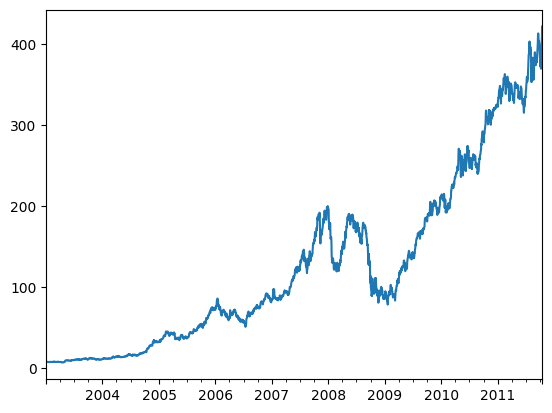

In [430]:
close_px["AAPL"].plot()

<Axes: >

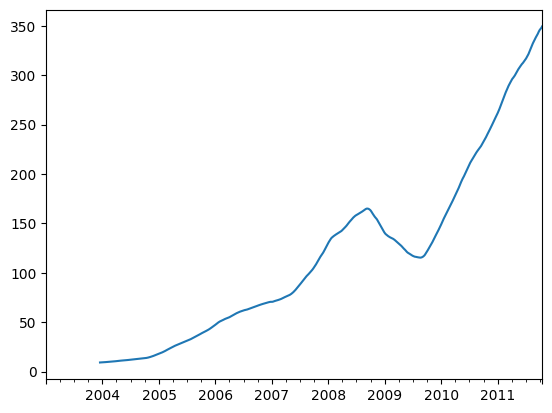

In [436]:
close_px["AAPL"].rolling(250).mean().plot()

In [437]:
import matplotlib as plt

In [438]:
plt.figure()

TypeError: 'module' object is not callable

In [439]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

In [440]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

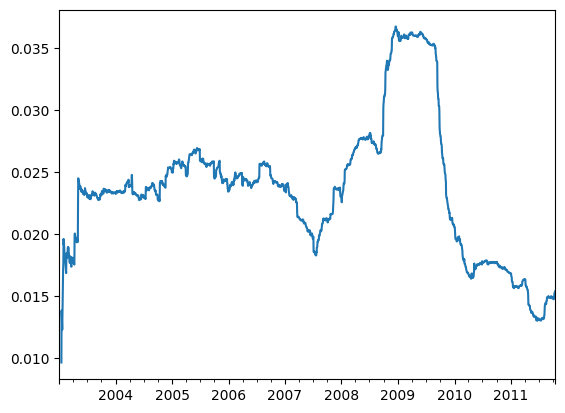

In [441]:
std250.plot()

In [442]:
expanding_mean = std250.expanding().mean()

In [443]:
plt.style.use('grayscale')

<Axes: >

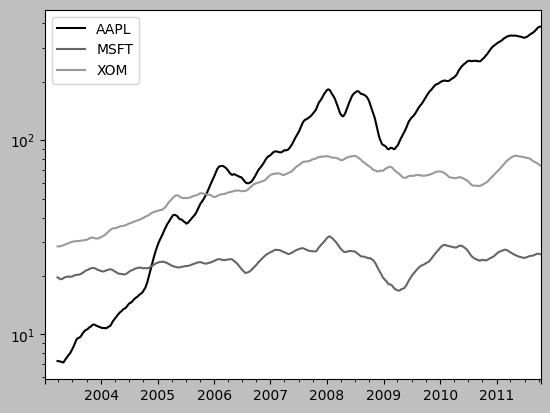

In [444]:
close_px.rolling(60).mean().plot(logy=True)

In [445]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## Exponentially Weighted Functions

In [446]:
aapl_px = close_px["AAPL"]["2006":"2007"]

In [447]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [448]:
ewma30 = aapl_px.ewm(span=30).mean()

<Axes: >

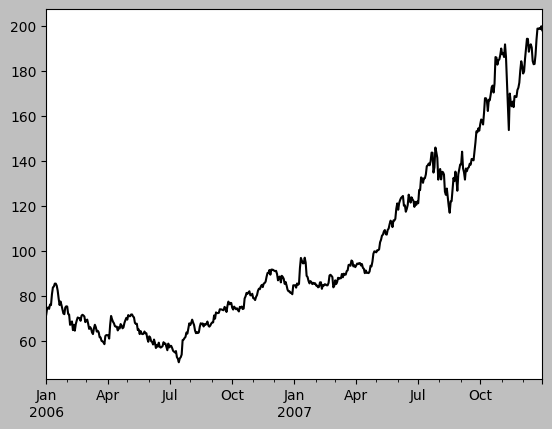

In [449]:
aapl_px.plot(style="k-", label="Price")

<Axes: >

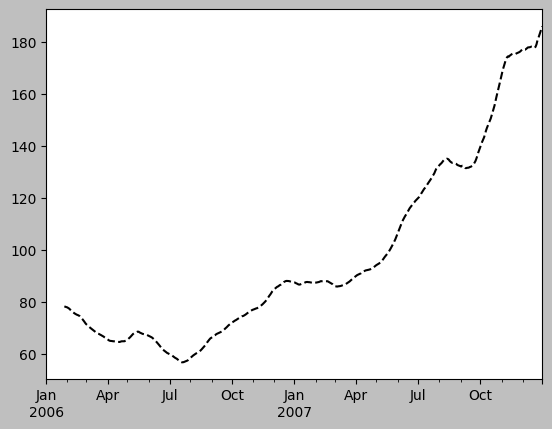

In [450]:
ma30.plot(style="k--", label="Simple Moving Avg")

<Axes: >

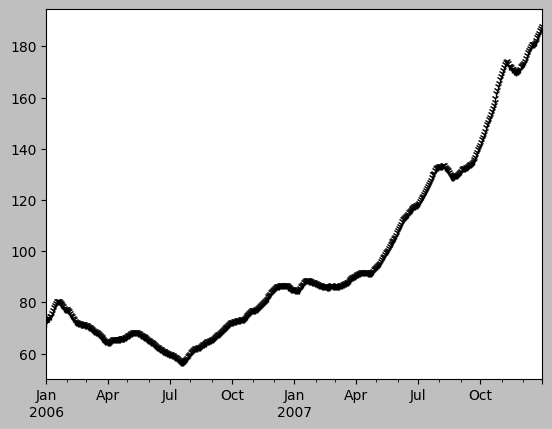

In [452]:
ewma30.plot(style="k1", label="EW MA")


## Binary Moving Window Functions

In [454]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [455]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

<Axes: >

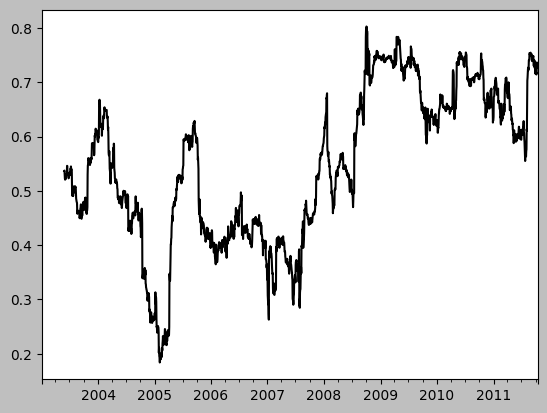

In [456]:
corr.plot()

In [457]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<Axes: >

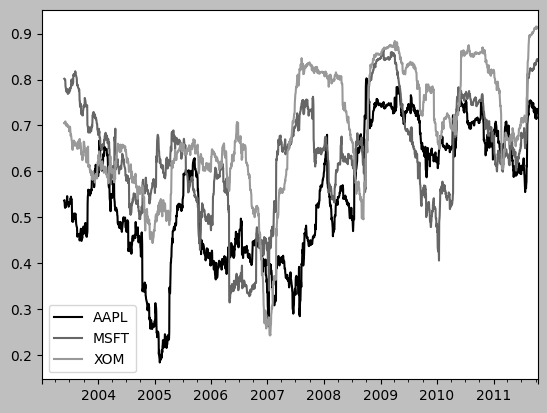

In [458]:
corr.plot()

In [459]:
from scipy.stats import percentileofscore

In [460]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

In [461]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)

<Axes: >

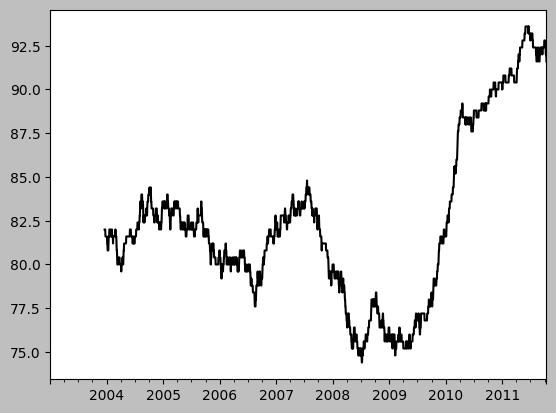

In [462]:
result.plot()